In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json

In [17]:
bus = 'storage/yelp_data/health_business01.csv'

In [4]:
pp = 'storage/yelp_data/yelp_academic_dataset_review.json'

In [5]:
%%time
with open(pp, encoding="utf-8") as f:
    data = pd.DataFrame(json.loads(line) for line in f)

CPU times: user 1min 14s, sys: 7.89 s, total: 1min 22s
Wall time: 1min 22s


In [6]:
list(data.columns)

['business_id',
 'cool',
 'date',
 'funny',
 'review_id',
 'stars',
 'text',
 'useful',
 'user_id']

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5996996 entries, 0 to 5996995
Data columns (total 9 columns):
business_id    object
cool           int64
date           object
funny          int64
review_id      object
stars          int64
text           object
useful         int64
user_id        object
dtypes: int64(4), object(5)
memory usage: 411.8+ MB


In [8]:
data.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g


In [9]:
# review = data[['business_id',
#  'stars',
#  'text']]
review = data.copy()

In [10]:
review['len_text'] = review.text.apply(len)

In [11]:
review.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,len_text
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g,449
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g,317
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g,156
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g,901
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g,165


In [12]:
%%time
review.to_csv('storage/yelp_data/yelp_academic_dataset_review_full.csv')

CPU times: user 2min 10s, sys: 2.32 s, total: 2min 12s
Wall time: 2min 17s


In [13]:
review.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,len_text
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g,449
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g,317
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g,156
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g,901
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g,165


# load bus

In [18]:
df = pd.read_csv(bus)
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [19]:
df.head(2)

,business_id,name,categories
0,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical"
1,STcSSjPOZ0FWtjvjqw99Dg,Black Mountain Orthopaedics,"doctors, orthopedists, health & medical"


In [20]:
review.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,len_text
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g,449
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g,317


In [21]:
%%time
health = pd.merge(df,review, on='business_id')

CPU times: user 4.58 s, sys: 1.74 s, total: 6.32 s
Wall time: 6.32 s


In [22]:
health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54756 entries, 0 to 54755
Data columns (total 12 columns):
business_id    54756 non-null object
name           54756 non-null object
categories     54756 non-null object
cool           54756 non-null int64
date           54756 non-null object
funny          54756 non-null int64
review_id      54756 non-null object
stars          54756 non-null int64
text           54756 non-null object
useful         54756 non-null int64
user_id        54756 non-null object
len_text       54756 non-null int64
dtypes: int64(5), object(7)
memory usage: 5.4+ MB


In [23]:
health.head()

,business_id,name,categories,cool,date,funny,review_id,stars,text,useful,user_id,len_text
0,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2018-03-03,0,TNNkSmMfshsD3G60jTNjDA,1,Please stay away from this place if you can! I...,2,xv2V2GO5IZYvtw4oW7gQ1w,2002
1,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2015-11-29,0,v-iKdstPdCxJr8zV1ZMdrw,5,My husband has been a patient of Dr. Byrne for...,1,SjvWP7c9toeZoV_q62zhTA,877
2,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2016-06-03,0,BmNDRCV9_NzQ_KCChyfdEw,4,Dr. Byrne is a great doctor! She has great bed...,2,sZVHm1aLtvyH9trAc2_MgA,333
3,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2017-03-17,0,t_TKVMxKFYm9Hl-TIO7UUw,3,I'm raising my review as Dr Bryne's has been m...,3,8Y_irXocZdZxLs_qgzpjBw,649
4,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2016-08-31,0,NWRrpGRgWZBBj3lvCZGVKA,1,I wish I could give 0 stars. Worst office I've...,1,hVKPDGpG12z7vpScXaSakw,1408


In [24]:
%%time
health.to_csv('storage/yelp_data/health_raw00.csv')

CPU times: user 1.52 s, sys: 48 ms, total: 1.57 s
Wall time: 1.73 s


In [26]:
health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54756 entries, 0 to 54755
Data columns (total 12 columns):
business_id    54756 non-null object
name           54756 non-null object
categories     54756 non-null object
cool           54756 non-null int64
date           54756 non-null object
funny          54756 non-null int64
review_id      54756 non-null object
stars          54756 non-null int64
text           54756 non-null object
useful         54756 non-null int64
user_id        54756 non-null object
len_text       54756 non-null int64
dtypes: int64(5), object(7)
memory usage: 5.4+ MB


In [27]:
health.head()

,business_id,name,categories,cool,date,funny,review_id,stars,text,useful,user_id,len_text
0,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2018-03-03,0,TNNkSmMfshsD3G60jTNjDA,1,Please stay away from this place if you can! I...,2,xv2V2GO5IZYvtw4oW7gQ1w,2002
1,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2015-11-29,0,v-iKdstPdCxJr8zV1ZMdrw,5,My husband has been a patient of Dr. Byrne for...,1,SjvWP7c9toeZoV_q62zhTA,877
2,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2016-06-03,0,BmNDRCV9_NzQ_KCChyfdEw,4,Dr. Byrne is a great doctor! She has great bed...,2,sZVHm1aLtvyH9trAc2_MgA,333
3,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2017-03-17,0,t_TKVMxKFYm9Hl-TIO7UUw,3,I'm raising my review as Dr Bryne's has been m...,3,8Y_irXocZdZxLs_qgzpjBw,649
4,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2016-08-31,0,NWRrpGRgWZBBj3lvCZGVKA,1,I wish I could give 0 stars. Worst office I've...,1,hVKPDGpG12z7vpScXaSakw,1408


In [ ]:
# %%time
# health.to_csv('storage/yelp_data/health_clean0918.csv')

In [30]:
health.head(2)

,business_id,name,categories,cool,date,funny,review_id,stars,text,useful,user_id,len_text
0,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2018-03-03,0,TNNkSmMfshsD3G60jTNjDA,1,Please stay away from this place if you can! I...,2,xv2V2GO5IZYvtw4oW7gQ1w,2002
1,y-4xTZNKVm8mAZpiXMS5ZA,"Lauren Byrne, MD","urologists, doctors, health & medical",0,2015-11-29,0,v-iKdstPdCxJr8zV1ZMdrw,5,My husband has been a patient of Dr. Byrne for...,1,SjvWP7c9toeZoV_q62zhTA,877


In [ ]:
health.info()

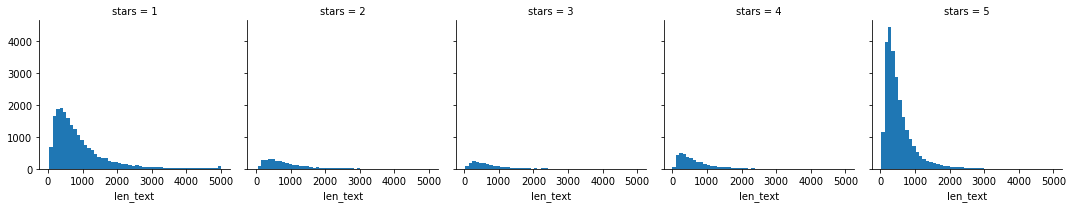

In [28]:
g = sns.FacetGrid(data=health, col='stars')
g.map(plt.hist, 'len_text', bins=50)